In [2]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn                   # Graphics
import geopandas as gp                # Spatial data manipulation
import pandas                    # Tabular data manipulation
import rioxarray                 # Surface data manipulation
import xarray                    # Surface data manipulation
from pysal.explore import esda   # Exploratory Spatial analytics
from pysal.lib import weights    # Spatial weights
import contextily                # Background tiles

In [52]:
import pandas as pd 
import os

geo_od = pd.read_csv('/Users/meera/Documents/drugs/Data/geo_od.csv')


gdf = geopandas.GeoDataFrame(
    geo_od, geometry=geopandas.points_from_xy(geo_od.Longitude, geo_od.Latitude))

gdf.crs = "EPSG:3857"
gdf = gdf.to_crs(epsg=3857)

gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
gdf_2019 = gdf[gdf['Year'] == 2019]
gdf_2019.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

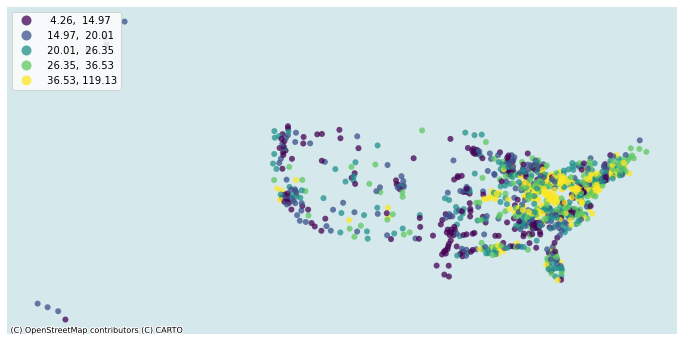

In [54]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(12, 15))
# Build choropleth
gdf_2019.plot(
    column='Cruder Rate', 
    cmap='viridis', 
    scheme='quantiles',
    k=5, 
    edgecolor='white', 
    linewidth=0., 
    alpha=0.75, 
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax
)
# Add basemap
contextily.add_basemap(
    ax, 
    crs=gdf_2019.crs, 
    source=contextily.providers.CartoDB.VoyagerNoLabels
)
# Remove axes
ax.set_axis_off();

In [55]:
gdf

,Year,State_x,State Abv,State Code,County_x,County Code,Deaths,Population,Crude Rate,Cruder Rate,...,Jail Population,Incarceration Rate per 100k,StateFIPS,CountyFIPS,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude,geometry
0,1999.0,Alabama,AL,1.0,"Baldwin County, AL",1003,11.0,137555.0,Unreliable,7.996801,...,390.000000,440.340000,1,3,14668.0,10.5,39194.0,30.659218,-87.746067,POINT (-87.746 30.659)
1,1999.0,Alabama,AL,1.0,"Jefferson County, AL",1073,34.0,662845.0,5.13,5.129404,...,1779.000000,408.230000,1,73,89661.0,13.7,35885.0,33.553444,-86.896536,POINT (-86.897 33.553)
2,1999.0,Alabama,AL,1.0,"Madison County, AL",1089,10.0,274693.0,Unreliable,3.640428,...,713.000000,382.130000,1,89,30056.0,11.1,43718.0,34.764238,-86.551080,POINT (-86.551 34.764)
3,1999.0,Alabama,AL,1.0,"Mobile County, AL",1097,28.0,399323.0,7.01,7.011868,...,1223.000000,470.210000,1,97,72372.0,18.3,32396.0,30.684572,-88.196568,POINT (-88.197 30.685)
4,1999.0,Alaska,AK,2.0,"Anchorage Borough, AK",2020,21.0,259348.0,8.10,8.097228,...,NaN,NaN,2,20,18397.0,7.2,52959.0,61.174250,-149.284329,POINT (-149.284 61.174)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,2020.0,Wisconsin,WI,55.0,"Winnebago County, WI",55139,38.0,171631.0,22.14,22.140522,...,NaN,NaN,55,139,14219.0,8.7,64653.0,44.085707,-88.668149,POINT (-88.668 44.086)
15892,2020.0,Wisconsin,WI,55.0,"Wood County, WI",55141,18.0,72560.0,Unreliable,24.807056,...,NaN,NaN,55,141,6732.0,9.4,54154.0,44.461413,-90.038825,POINT (-90.039 44.461)
15893,2020.0,Wyoming,WY,56.0,"Laramie County, WY",56021,17.0,100595.0,Unreliable,16.899448,...,NaN,NaN,56,21,7242.0,7.4,69450.0,41.292830,-104.660395,POINT (-104.660 41.293)
15894,2020.0,Wyoming,WY,56.0,"Natrona County, WY",56025,16.0,80815.0,Unreliable,19.798305,...,NaN,NaN,56,25,7420.0,9.4,65901.0,42.977645,-106.768219,POINT (-106.768 42.978)


In [43]:
weights.contiguity.Rook.from_dataframe(gdf)

KeyError: 379

In [51]:
# Get points in a grid
import contextily
import geopandas
import rioxarray
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry
from pysal.lib import weights

l = numpy.arange(3)
xs, ys = numpy.meshgrid(l, l)
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()):
    poly = Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])
    polys.append(poly)
# Convert to GeoSeries
polys = geopandas.GeoSeries(polys)
gdf = geopandas.GeoDataFrame(
    {
        'geometry': polys, 
        'id': ['P-%s'%str(i).zfill(2) for i in range(len(polys))]
    }
)

gdf

,geometry,id
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",P-00
1,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",P-01
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",P-02
3,"POLYGON ((0.00000 1.00000, 1.00000 1.00000, 1....",P-03
4,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",P-04
5,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3....",P-05
6,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1....",P-06
7,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....",P-07
8,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3....",P-08
